In [1]:
import re  # 正则表达式
import pandas as pd  # pandas数据分析
import numpy as np  # 
import matplotlib.pyplot as plt  # 可视化画图
import jieba # 分词
from wordcloud import WordCloud # 词云可视化

In [2]:
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
#配置风格
plt.rcParams["axes.labelsize"] = 16.
plt.rcParams["xtick.labelsize"] = 14.
plt.rcParams["ytick.labelsize"] = 14.
plt.rcParams["legend.fontsize"] = 12.
plt.rcParams["figure.figsize"] = [15.,15.]

In [3]:
data = pd.read_csv('CarCon.csv',encoding='gbk')
data.head() 

,车名,车牌,类型,评分,最高价,最低价,总评数,差评词,差评词次数,总评前几,总评前几内容次数,好评词,好评词次数,手动耗油/L,自动耗油/L
0,奔奔EV,长安,微型车,4.81,144800,95800,4,后备厢空间小,3,"乘坐空间不错,外观时尚,外观比较时尚,后备厢空间小",20,"乘坐空间不错,外观时尚,外观比较时尚",17,12.0,12.0
1,江铃E200N,江铃集团新能源,微型车,4.75,93800,85800,21,"乘坐空间小,乘坐空间很一般",6,"前排座椅很舒服,乘坐空间很一般,乘坐空间小",9,前排座椅很舒服,3,NaN,NaN
2,EC系列,北汽新能源,微型车,4.75,61800,59800,4,"后备厢空间太小,悬架减震硬,底盘低",16,"乘坐空间不错,外观时尚,充电方便,后备厢空间太小,操控轻便,悬架减震硬,续航里程不错,中控屏...",63,"乘坐空间不错,外观时尚,充电方便",28,NaN,NaN
3,众泰E200,众泰,微型车,4.65,69900,69900,61,"悬架减震硬,后备厢空间有点小,悬架减震偏硬",45,"外观时尚,乘坐空间不错,安全配置挺好,悬架减震硬,转向手感很轻,乘坐空间完全够用,后备厢空间...",212,"外观时尚,乘坐空间不错,安全配置挺好",113,11.4,11.4
4,江铃E200L,江铃集团新能源,微型车,4.51,90800,82800,9,"充电速度太长了,续航里程短",6,"充电速度太长了,续航里程短,乘坐空间可以的",9,乘坐空间可以的,3,10.0,10.0


In [4]:
data.sort_values('评分',ascending=False).head() # 评分最高的五个汽车信息

,车名,车牌,类型,评分,最高价,最低价,总评数,差评词,差评词次数,总评前几,总评前几内容次数,好评词,好评词次数,手动耗油/L,自动耗油/L
282,上汽大通V80,上汽大通,轻客,4.88,1300000,135800,8,NaN,0,"乘坐空间不错,油耗满意,外观漂亮",10,"乘坐空间不错,外观漂亮,油耗满意",10,NaN,NaN
324,U5 SUV,纳智捷,小型SUV,4.88,99800,75800,11,"味道很大,悬架偏硬,起步动力有点肉",11,"油耗满意,乘坐空间很满意,外观时尚,车子配置推荐,后备厢空间大,后排空间很大,转向精准,储物...",114,"油耗满意,乘坐空间很满意,外观时尚",66,NaN,NaN
186,捷豹F-TYPE,捷豹,跑车,4.88,1628000,598000,3,NaN,0,乘坐空间不错,3,乘坐空间不错,3,12.0,12.0
195,斯派卡,野马汽车,MPV,4.88,75800,59800,11,NaN,0,乘坐空间满意,7,乘坐空间满意,7,NaN,NaN
273,优劲,开瑞,微卡,4.88,46500,34500,15,NaN,0,"乘坐空间能装,油耗满意,外观漂亮",16,"乘坐空间能装,油耗满意,外观漂亮",16,8.2,8.2


In [7]:
data.sort_values('最高价',ascending=False).head() # 价格最高的五个汽车信息

,车名,车牌,类型,评分,最高价,最低价,总评数,差评词,差评词次数,总评前几,总评前几内容次数,好评词,好评词次数,手动耗油/L,自动耗油/L
190,保时捷911,保时捷,跑车,4.41,3898000,1228000,27,悬架减震硬,4,"油耗能接受,外观满意,乘坐空间大,悬架减震硬,操控一级棒,内饰造型满意,前排空间很充裕,路感...",46,"油耗能接受,外观满意,乘坐空间大",26,13.9,10.0
505,奔驰G级AMG,奔驰,中大型SUV,3.96,3532800,2146800,9,乘坐空间不够,3,"外观霸气,乘坐空间不够",9,外观霸气,6,NaN,NaN
184,Panamera新能源,保时捷,大型车,4.44,2548000,1198000,4,NaN,0,乘坐空间不错,4,乘坐空间不错,4,8.3,26.0
182,宝马7系,宝马,大型车,4.56,2488000,828000,70,"胎噪有点大,储物空间偏少",12,"乘坐空间没的说,油耗满意,操控很好,车子配置很高,外观很霸气,后排空间大,隔音安静,转向手感...",164,"乘坐空间没的说,油耗满意,操控很好",92,10.4,11.9
185,Panamera,保时捷,大型车,4.36,2178000,998000,63,"储物空间比较少,内饰颜色单一,转向手感太重",24,"乘坐空间还不错,外观稳重,油耗满意,储物空间比较少,车尾灯很赞,操控很好,后排空间大,内饰造...",139,"乘坐空间还不错,外观稳重,油耗满意",78,12.5,12.4


In [8]:
data.sort_values('最低价',ascending=False).tail() # 价格最低的五个汽车信息

,车名,车牌,类型,评分,最高价,最低价,总评数,差评词,差评词次数,总评前几,总评前几内容次数,好评词,好评词次数,手动耗油/L,自动耗油/L
262,长安之星3,长安欧尚,微面,3.99,39900,29900,43,"发动机噪音很大,起步动力肉",9,"乘坐空间够用,油耗满意,外观漂亮,保养费用便宜,大灯犀利,发动机噪音很大,高速油耗稳定,内饰...",69,"乘坐空间够用,油耗满意,大灯犀利",37,6.8,7.0
280,五菱之光小卡,五菱汽车,微卡,3.84,32900,29900,23,后排空间太小,3,"油耗满意,后排空间太小",9,油耗满意,6,7.5,7.5
265,东风小康K07S,东风小康,微面,3.88,32900,28900,3,NaN,0,乘坐空间没问题,3,乘坐空间没问题,3,6.6,6.6
266,佳宝V75,一汽,微面,3.88,30900,28900,8,NaN,0,油耗满意,4,油耗满意,4,7.0,7.0
270,佳宝V52,一汽,微面,3.67,29200,27200,45,NaN,0,"油耗比较低,乘坐空间没的说",13,"油耗比较低,乘坐空间没的说",13,7.3,7.3


In [9]:
len(data)

509

In [10]:
data.sort_values('好评词次数',ascending=False).head() # 好评内容次数最多的五个汽车信息

,车名,车牌,类型,评分,最高价,最低价,总评数,差评词,差评词次数,总评前几,总评前几内容次数,好评词,好评词次数,手动耗油/L,自动耗油/L
100,阿特兹,马自达,中型车,4.66,237800,175800,4445,"胎噪有点大,隔音不好,悬架减震偏硬",1425,"外观漂亮,油耗满意,乘坐空间够用,安全配置稳定,后备厢空间很大,操控之王,转向精准,转向手感...",11071,"外观漂亮,油耗满意,乘坐空间够用",6114,8.3,8.8
402,RAV4荣放,丰田,紧凑型SUV,4.61,269800,179800,4009,"悬架减震偏硬,隔音不好,味道大",1060,"乘坐空间满意,油耗满意,外观时尚,安全配置齐全,悬架减震偏硬,后排空间大,后备厢空间很大,转...",10244,"乘坐空间满意,油耗满意,外观时尚",6001,8.6,10.0
385,马自达CX-4,马自达,紧凑型SUV,4.65,215800,140800,4320,"后排空间小,车内静音效果不是很好,悬架减震偏硬",1436,"外观漂亮,油耗满意,乘坐空间够用,车子配置很高,后排空间小,后备厢空间很大,操控很棒,转向精...",9225,"外观漂亮,油耗满意,乘坐空间够用",4819,7.8,8.1
377,荣威RX5,荣威,紧凑型SUV,4.66,188800,99800,2939,"悬架减震有点硬,隔音不好,味道大",1288,"乘坐空间满意,油耗满意,外观漂亮,安全配置齐全,悬架减震有点硬,后备厢空间很大,转向手感很轻...",7971,"乘坐空间满意,油耗满意,外观漂亮",4579,7.5,7.5
79,卡罗拉,丰田,紧凑型车,4.55,175800,107800,2729,"隔音不好,悬架减震比较硬,胎噪有点大",999,"油耗满意,乘坐空间不错,外观漂亮,安全配置,后排空间大,后备厢空间很大,隔音不好,转向精准,...",7688,"油耗满意,乘坐空间不错,外观漂亮",4553,6.7,7.3


In [11]:
data.sort_values('总评数',ascending=False).head() # 总评最多的五个汽车信息

,车名,车牌,类型,评分,最高价,最低价,总评数,差评词,差评词次数,总评前几,总评前几内容次数,好评词,好评词次数,手动耗油/L,自动耗油/L
100,阿特兹,马自达,中型车,4.66,237800,175800,4445,"胎噪有点大,隔音不好,悬架减震偏硬",1425,"外观漂亮,油耗满意,乘坐空间够用,安全配置稳定,后备厢空间很大,操控之王,转向精准,转向手感...",11071,"外观漂亮,油耗满意,乘坐空间够用",6114,8.3,8.8
385,马自达CX-4,马自达,紧凑型SUV,4.65,215800,140800,4320,"后排空间小,车内静音效果不是很好,悬架减震偏硬",1436,"外观漂亮,油耗满意,乘坐空间够用,车子配置很高,后排空间小,后备厢空间很大,操控很棒,转向精...",9225,"外观漂亮,油耗满意,乘坐空间够用",4819,7.8,8.1
402,RAV4荣放,丰田,紧凑型SUV,4.61,269800,179800,4009,"悬架减震偏硬,隔音不好,味道大",1060,"乘坐空间满意,油耗满意,外观时尚,安全配置齐全,悬架减震偏硬,后排空间大,后备厢空间很大,转...",10244,"乘坐空间满意,油耗满意,外观时尚",6001,8.6,10.0
49,名爵6,名爵,紧凑型车,4.69,146800,96800,3259,"悬架减震偏硬,胎噪有点大,车内静音效果不是很好",1217,"乘坐空间不错,外观漂亮,油耗满意,安全配置齐全,后备厢空间大,悬架减震偏硬,加速动力十足,胎...",7250,"乘坐空间不错,外观漂亮,油耗满意",3921,7.3,7.2
377,荣威RX5,荣威,紧凑型SUV,4.66,188800,99800,2939,"悬架减震有点硬,隔音不好,味道大",1288,"乘坐空间满意,油耗满意,外观漂亮,安全配置齐全,悬架减震有点硬,后备厢空间很大,转向手感很轻...",7971,"乘坐空间满意,油耗满意,外观漂亮",4579,7.5,7.5


In [12]:
# 词云。看那种车购买次数最多
final = ''  
stopwords = ['车','（','）'] # 停止词
for n in range(len(data)):
    
    seg_list = list(jieba.cut(data['车名'][n]))
   
    for seg in seg_list:  
        if seg not in stopwords:  
                final = final + seg + ' '

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\10406\AppData\Local\Temp\jieba.cache
Loading model cost 1.645 seconds.
Prefix dict has been built succesfully.


Populating the interactive namespace from numpy and matplotlib


(-0.5, 399.5, 199.5, -0.5)

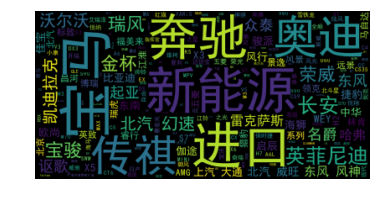

In [13]:
from wordcloud import WordCloud
font = r'C:\Users\10406\Desktop\simheittf\simhei.ttf'
wordcloud = WordCloud(font_path=font).generate(final)
final = " ".join(jieba.cut(final))

%pylab inline
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [14]:
from wordcloud import WordCloud
font = r'C:\Users\10406\Desktop\simheittf\simhei.ttf'
wordcloud = WordCloud(font_path=font,                      
                     #设置背景色，默认为黑，可根据需要自定义为颜色
                      background_color='white', 
                    #允许最大词汇
                      max_words=400,
                    #最大号字体，如果不指定则为图像高度
                      max_font_size=50,
                    #画布宽度和高度，如果设置了msak则不会生效
                      width=200,
                      height = 150,
                      margin = 2,
                    #词语水平摆放的频率，默认为0.9.即竖直摆放的频率为0.1
                      prefer_horizontal = 0.8
                     ).generate(final)
final = " ".join(jieba.cut(final))

Populating the interactive namespace from numpy and matplotlib


(-0.5, 199.5, 149.5, -0.5)

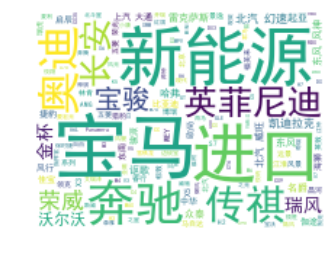

In [15]:
%pylab inline
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [16]:
from wordcloud import WordCloud
from scipy.misc import imread
font = r'C:\Users\10406\Desktop\simheittf\simhei.ttf'
color_mask = imread(r"E:\jupyter-notebook\data\001.jpg") #读取背景图片，
wordcloud = WordCloud(font_path=font,                      
                     #设置背景色，默认为黑，可根据需要自定义为颜色
                      background_color='white', 
                    #允许最大词汇
                      max_words=400,
                      mask=color_mask,
                    #最大号字体，如果不指定则为图像高度
                      max_font_size=50,
                    #画布宽度和高度，如果设置了msak则不会生效
                      width=200,
                      height = 150,
                      margin = 2,
                    #词语水平摆放的频率，默认为0.9.即竖直摆放的频率为0.1
                      prefer_horizontal = 0.8
                     ).generate(final)
final = " ".join(jieba.cut(final))

Populating the interactive namespace from numpy and matplotlib


C:\Python\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['imread']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


(-0.5, 499.5, 322.5, -0.5)

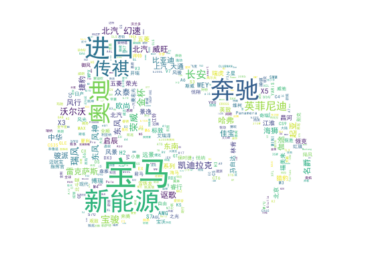

In [17]:
%pylab inline
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [18]:
# 查看薪资分类及分布
data['类型'].value_counts().head(10)

小型SUV     50
紧凑型SUV    50
中型SUV     50
中型车       50
MPV       49
紧凑型车      49
中大型SUV    33
小型车       33
中大型车      31
微面        29
Name: 类型, dtype: int64

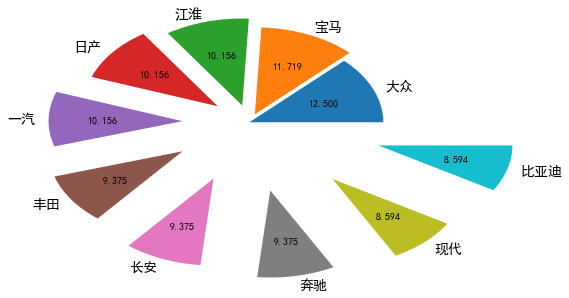

In [19]:
# 各个品牌汽车的 占比
labels= list(data['车牌'].value_counts().head(10).index)
fracs = list(data['车牌'].value_counts().head(10).values)
explode = [0, 0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0] 
plt.pie(x=fracs, labels=labels, explode=explode, autopct='%.3f')
plt.show()

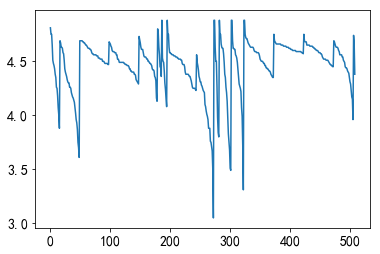

In [20]:
# 评分画图
data['评分'].plot()
plt.show()

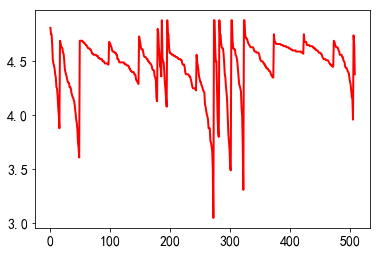

In [21]:
# 评分画图
plt.plot(data['评分'],color = "r", linewidth =2)
plt.show()

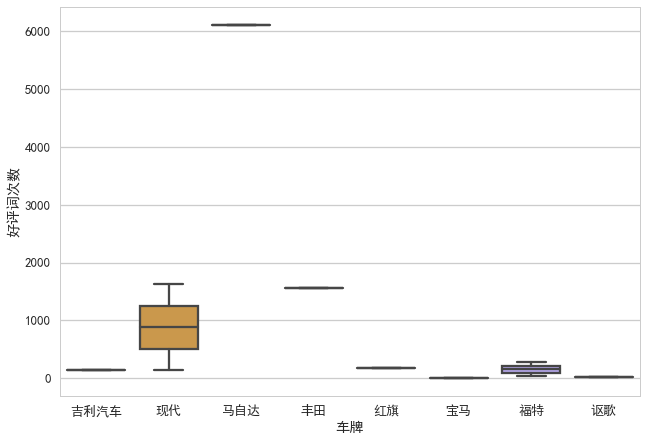

In [283]:
import seaborn as sns
import matplotlib as mpl

sns.set_context("talk")
#mpl.rcParams['font.sans-serif'] = ['simhei']
#mpl.rcParams['axes.unicode_minus'] = False 
# 中型车的各个品牌 好评次次数
gz_data = data[data['类型']=='中型车'].head(10)
sns.boxplot(x=gz_data['车牌'], y=gz_data['好评词次数'].astype(np.int64))
sns.set_style('whitegrid',{'font.sans-serif':['simhei','Arial']})
plt.show()

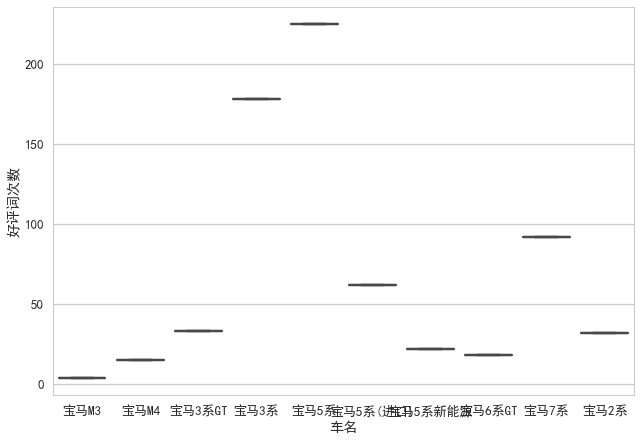

In [284]:
# 看看宝马各个车次的好评次数。
gz_data = data[data['车牌']=='宝马'].head(10)
sns.boxplot(x=gz_data['车名'], y=gz_data['好评词次数'].astype(np.int64))
sns.set_style('whitegrid',{'font.sans-serif':['simhei','Arial']})
plt.show()

In [285]:
data.head(2)

,车名,车牌,类型,评分,最高价,最低价,总评数,差评词,差评词次数,总评前几,总评前几内容次数,好评词,好评词次数,手动耗油/L,自动耗油/L
0,奔奔EV,长安,微型车,4.81,144800,95800,4,后备厢空间小,3,"乘坐空间不错,外观时尚,外观比较时尚,后备厢空间小",20,"乘坐空间不错,外观时尚,外观比较时尚",17,12.0,12.0
1,江铃E200N,江铃集团新能源,微型车,4.75,93800,85800,21,"乘坐空间小,乘坐空间很一般",6,"前排座椅很舒服,乘坐空间很一般,乘坐空间小",9,前排座椅很舒服,3,NaN,NaN


In [286]:
# 按类型求评分和
data.groupby(by='类型').agg({'评分':sum}).reset_index()

,类型,评分
0,MPV,218.83
1,中型SUV,228.90
2,中型车,224.14
3,中大型SUV,147.61
4,中大型车,139.26
5,低端皮卡,91.92
6,大型SUV,13.78
7,大型车,32.00
8,小型SUV,227.63
9,小型车,140.38


In [287]:
# 每中车类型的评分，求最值 ----方便用户根据类型评分 选择类型
data.groupby(by='类型').agg({'评分':['max', 'min']}).reset_index()

类型    评分      
             max   min
0      MPV  4.88  4.23
1    中型SUV  4.75  4.45
2      中型车  4.68  4.29
3   中大型SUV  4.69  3.96
4     中大型车  4.73  4.13
5     低端皮卡  4.88  3.31
6    大型SUV  4.74  4.38
7      大型车  4.80  4.36
8    小型SUV  4.88  4.35
9      小型车  4.69  3.61
10      微卡  4.88  3.80
11     微型车  4.81  3.88
12      微面  4.56  3.05
13  紧凑型SUV  4.75  4.57
14    紧凑型车  4.69  4.47
15      跑车  4.88  4.08
16      轻客  4.88  3.49

In [288]:
# 按不同类型的车牌 求 评分和
data.groupby(by=['类型', '车牌']).agg({'评分':sum}).reset_index().head(10)

,类型,车牌,评分
0,MPV,上汽大通,4.53
1,MPV,东风,4.38
2,MPV,东风风行,17.80
3,MPV,克莱斯勒,4.56
4,MPV,别克,8.78
5,MPV,力帆汽车,4.58
6,MPV,北汽威旺,8.77
7,MPV,北汽幻速,4.37
8,MPV,北汽昌河,4.32
9,MPV,启辰,4.75


In [289]:
# 各个车类型 的 平均评分。方便用户选择车类型
type_ave = data.groupby('类型')['评分'].mean()
type_ave

类型
MPV       4.465918
中型SUV     4.578000
中型车       4.482800
中大型SUV    4.473030
中大型车      4.492258
低端皮卡      4.377143
大型SUV     4.593333
大型车       4.571429
小型SUV     4.552600
小型车       4.253939
微卡        4.364444
微型车       4.388125
微面        4.067931
紧凑型SUV    4.626000
紧凑型车      4.576122
跑车        4.398889
轻客        4.276500
Name: 评分, dtype: float64

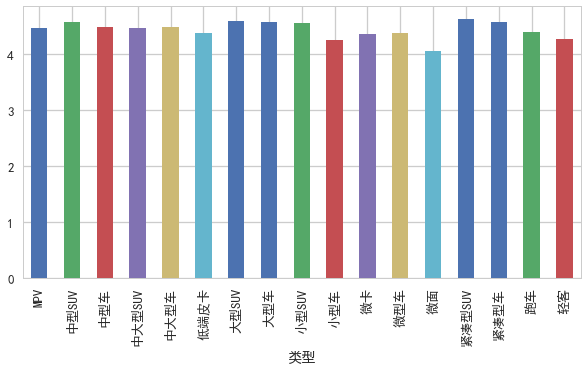

In [290]:
# 每个类型的平均评分，画出柱状图
plt.figure(figsize=(10,5))
type_ave.plot.bar()
plt.show()

In [291]:
# 所有车牌的平均评分按倒序排序，取出前五。方便用户买车
type_ave = data.groupby('车牌')['评分'].mean()
type_ave.sort_values(ascending=False).head() 

车牌
野马汽车     4.730000
云度       4.710000
捷途       4.690000
北汽新能源    4.663333
陆风       4.655000
Name: 评分, dtype: float64

In [292]:
# 定义雷达图函数
def plotlinebar(dataType_list, data_sala, data_num):
    # dataType_list 横坐标轴， data_sala 特征下的平均薪水， data_num 数据在特征下分组的数量
    dataType_sala = []
    for i in range(len(dataType_list)):
        numa = list(data_sala[dataType_list[i]].index)
        numb = list(data_sala[dataType_list[i]].values)
        result = sum(np.multiply(np.array(numa), np.array(numb)))/sum(numb)
        dataType_sala.append(result)
    dataType_sala = np.array(dataType_sala)
    
    angles = np.linspace(0, 2*np.pi, len(dataType_list), endpoint=False)
    data = np.concatenate((dataType_sala, [dataType_sala[0]]))
    angles = np.concatenate((angles, [angles[0]]))
                            
    ax = plt.figure(figsize=(10, 10)).add_subplot(111, polar=True)
    ax.plot(angles, data, 'bo-', linewidth=2)
    ax.fill(angles, data, facecolor='r', alpha=0.3)
    ax.set_thetagrids(angles*180/np.pi, dataType_list)    
    plt.show()


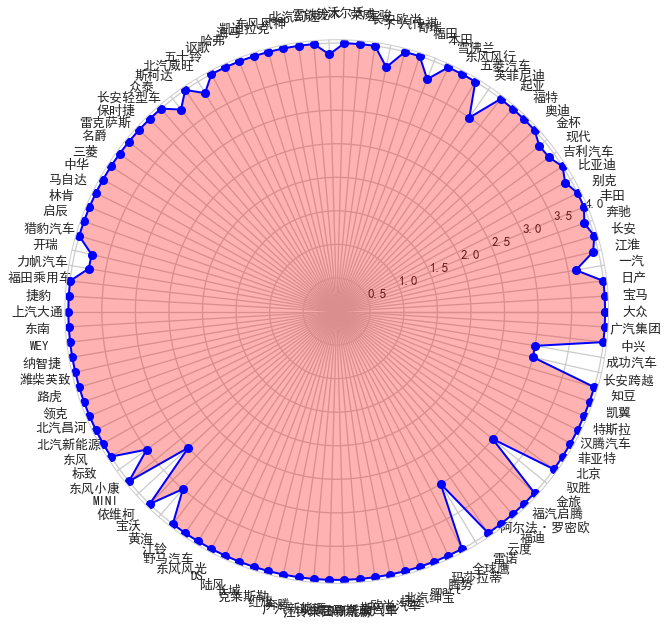

In [293]:
# 所属车牌与评分关系
indcateType_list = list(data['车牌'].value_counts().index)  # 以车牌总数为索引
indcate_sala = data['评分'].astype(np.int64).groupby(data['车牌']).value_counts()
indcate_num = list(data['车牌'].value_counts())
plotlinebar(indcateType_list, indcate_sala, indcate_num)

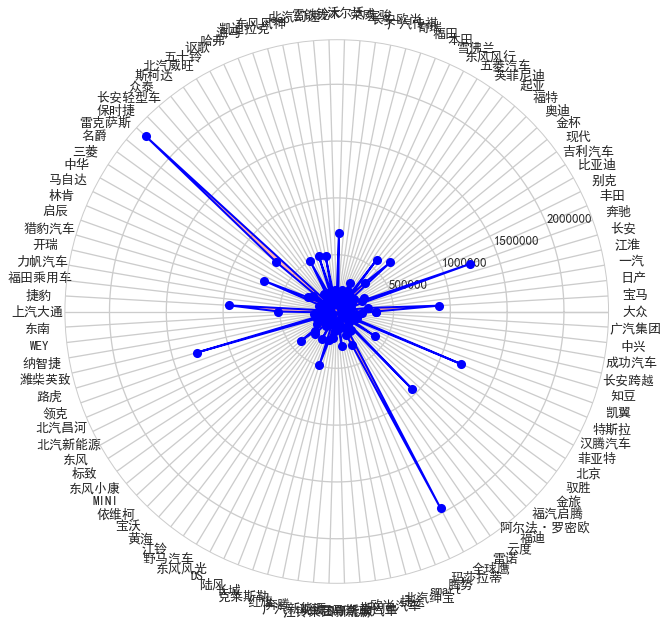

In [294]:
# 所属车牌与最高价关系
indcateType_list = list(data['车牌'].value_counts().index)
indcate_sala = data['最高价'].astype(np.int64).groupby(data['车牌']).value_counts()
indcate_num = list(data['车牌'].value_counts())
plotlinebar(indcateType_list, indcate_sala, indcate_num)

In [295]:
ave = (data['最高价']+data['最低价'])/2
ave.head()

0    120300.0
1     89800.0
2     60800.0
3     69900.0
4     86800.0
dtype: float64

In [296]:
dicts = {'类型':data['类型'],'车牌':data['车牌'],'车名':data['车名'],'评分':data['评分'],'平均价':ave,'最高价':data['最高价'],'最低价':data['最低价']}
newdata = pd.DataFrame(dicts)
newdata.head()

,平均价,最低价,最高价,类型,评分,车名,车牌
0,120300.0,95800,144800,微型车,4.81,奔奔EV,长安
1,89800.0,85800,93800,微型车,4.75,江铃E200N,江铃集团新能源
2,60800.0,59800,61800,微型车,4.75,EC系列,北汽新能源
3,69900.0,69900,69900,微型车,4.65,众泰E200,众泰
4,86800.0,82800,90800,微型车,4.51,江铃E200L,江铃集团新能源


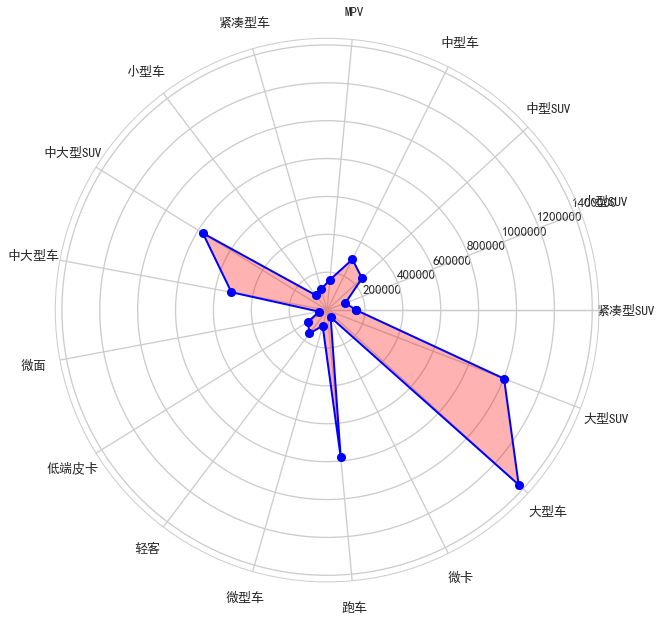

In [297]:
# 所属车类型与平均价格关系
indcateType_list = list(newdata['类型'].value_counts().index)  # 以车牌总数为索引
indcate_sala = newdata['平均价'].astype(np.int64).groupby(newdata['类型']).value_counts()
indcate_num = list(newdata['类型'].value_counts())
plotlinebar(indcateType_list, indcate_sala, indcate_num)

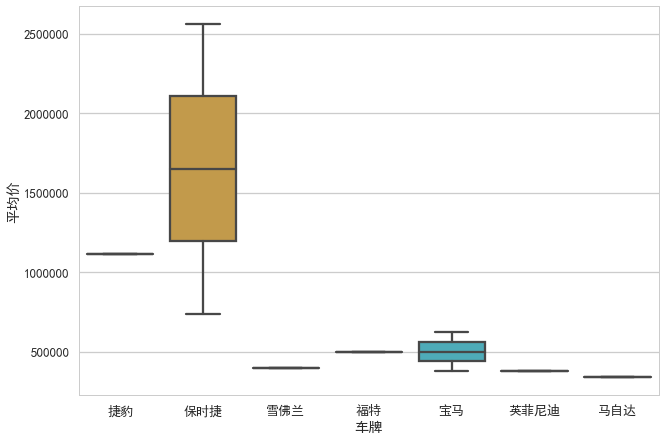

In [298]:
#mpl.rcParams['font.sans-serif'] = ['simhei']
#mpl.rcParams['axes.unicode_minus'] = False 
# 跑车 平均价格 查看
gz_data = newdata[newdata['类型']=='跑车']
sns.boxplot(x=gz_data['车牌'], y=gz_data['平均价'].astype(np.int64))
sns.set_style('whitegrid',{'font.sans-serif':['simhei','Arial']})
plt.show()

In [24]:
text = data.好评词.iloc[0]  # 对好评词第一句进行舆情分析
text

'乘坐空间不错,外观时尚,外观比较时尚'

In [25]:
from snownlp import SnowNLP  # 舆情分析库
s = SnowNLP(text)
s.sentiments

0.9999576267345791

In [26]:
# 对好评词，坏评词。所有的数据进行舆情分析
def get_sentiment_cn(text):  
    s = SnowNLP(str(text))     # 原始数据，汇报 float没有 len错误。所以加 str
    return s.sentiments

In [27]:
data["sentiment"] = data.好评词.apply(get_sentiment_cn)  # 好评内容舆情分数
data.head()

,车名,车牌,类型,评分,最高价,最低价,总评数,差评词,差评词次数,总评前几,总评前几内容次数,好评词,好评词次数,手动耗油/L,自动耗油/L,sentiment
0,奔奔EV,长安,微型车,4.81,144800,95800,4,后备厢空间小,3,"乘坐空间不错,外观时尚,外观比较时尚,后备厢空间小",20,"乘坐空间不错,外观时尚,外观比较时尚",17,12.0,12.0,0.999958
1,江铃E200N,江铃集团新能源,微型车,4.75,93800,85800,21,"乘坐空间小,乘坐空间很一般",6,"前排座椅很舒服,乘坐空间很一般,乘坐空间小",9,前排座椅很舒服,3,NaN,NaN,0.901265
2,EC系列,北汽新能源,微型车,4.75,61800,59800,4,"后备厢空间太小,悬架减震硬,底盘低",16,"乘坐空间不错,外观时尚,充电方便,后备厢空间太小,操控轻便,悬架减震硬,续航里程不错,中控屏...",63,"乘坐空间不错,外观时尚,充电方便",28,NaN,NaN,0.996210
3,众泰E200,众泰,微型车,4.65,69900,69900,61,"悬架减震硬,后备厢空间有点小,悬架减震偏硬",45,"外观时尚,乘坐空间不错,安全配置挺好,悬架减震硬,转向手感很轻,乘坐空间完全够用,后备厢空间...",212,"外观时尚,乘坐空间不错,安全配置挺好",113,11.4,11.4,0.999932
4,江铃E200L,江铃集团新能源,微型车,4.51,90800,82800,9,"充电速度太长了,续航里程短",6,"充电速度太长了,续航里程短,乘坐空间可以的",9,乘坐空间可以的,3,10.0,10.0,0.674340


In [28]:
data["LowSentiment"] = data.差评词.apply(get_sentiment_cn)  # 差评内容舆情分数
data.head()

,车名,车牌,类型,评分,最高价,最低价,总评数,差评词,差评词次数,总评前几,总评前几内容次数,好评词,好评词次数,手动耗油/L,自动耗油/L,sentiment,LowSentiment
0,奔奔EV,长安,微型车,4.81,144800,95800,4,后备厢空间小,3,"乘坐空间不错,外观时尚,外观比较时尚,后备厢空间小",20,"乘坐空间不错,外观时尚,外观比较时尚",17,12.0,12.0,0.999958,0.135649
1,江铃E200N,江铃集团新能源,微型车,4.75,93800,85800,21,"乘坐空间小,乘坐空间很一般",6,"前排座椅很舒服,乘坐空间很一般,乘坐空间小",9,前排座椅很舒服,3,NaN,NaN,0.901265,0.878560
2,EC系列,北汽新能源,微型车,4.75,61800,59800,4,"后备厢空间太小,悬架减震硬,底盘低",16,"乘坐空间不错,外观时尚,充电方便,后备厢空间太小,操控轻便,悬架减震硬,续航里程不错,中控屏...",63,"乘坐空间不错,外观时尚,充电方便",28,NaN,NaN,0.996210,0.005110
3,众泰E200,众泰,微型车,4.65,69900,69900,61,"悬架减震硬,后备厢空间有点小,悬架减震偏硬",45,"外观时尚,乘坐空间不错,安全配置挺好,悬架减震硬,转向手感很轻,乘坐空间完全够用,后备厢空间...",212,"外观时尚,乘坐空间不错,安全配置挺好",113,11.4,11.4,0.999932,0.005907
4,江铃E200L,江铃集团新能源,微型车,4.51,90800,82800,9,"充电速度太长了,续航里程短",6,"充电速度太长了,续航里程短,乘坐空间可以的",9,乘坐空间可以的,3,10.0,10.0,0.674340,0.843050


In [29]:
# 通过 好评舆情数 - 差评 舆情数 除以总评论数量。得出的数。判断哪个车舆情口碑好
data["AveSentiment"] = (data['sentiment']-data['LowSentiment'])/data['总评数']
data.head()

,车名,车牌,类型,评分,最高价,最低价,总评数,差评词,差评词次数,总评前几,总评前几内容次数,好评词,好评词次数,手动耗油/L,自动耗油/L,sentiment,LowSentiment,AveSentiment
0,奔奔EV,长安,微型车,4.81,144800,95800,4,后备厢空间小,3,"乘坐空间不错,外观时尚,外观比较时尚,后备厢空间小",20,"乘坐空间不错,外观时尚,外观比较时尚",17,12.0,12.0,0.999958,0.135649,0.216077
1,江铃E200N,江铃集团新能源,微型车,4.75,93800,85800,21,"乘坐空间小,乘坐空间很一般",6,"前排座椅很舒服,乘坐空间很一般,乘坐空间小",9,前排座椅很舒服,3,NaN,NaN,0.901265,0.878560,0.001081
2,EC系列,北汽新能源,微型车,4.75,61800,59800,4,"后备厢空间太小,悬架减震硬,底盘低",16,"乘坐空间不错,外观时尚,充电方便,后备厢空间太小,操控轻便,悬架减震硬,续航里程不错,中控屏...",63,"乘坐空间不错,外观时尚,充电方便",28,NaN,NaN,0.996210,0.005110,0.247775
3,众泰E200,众泰,微型车,4.65,69900,69900,61,"悬架减震硬,后备厢空间有点小,悬架减震偏硬",45,"外观时尚,乘坐空间不错,安全配置挺好,悬架减震硬,转向手感很轻,乘坐空间完全够用,后备厢空间...",212,"外观时尚,乘坐空间不错,安全配置挺好",113,11.4,11.4,0.999932,0.005907,0.016295
4,江铃E200L,江铃集团新能源,微型车,4.51,90800,82800,9,"充电速度太长了,续航里程短",6,"充电速度太长了,续航里程短,乘坐空间可以的",9,乘坐空间可以的,3,10.0,10.0,0.674340,0.843050,-0.018746


In [30]:
data.sort_values('AveSentiment',ascending=False).head() # 舆情评分最高的五个汽车信息

,车名,车牌,类型,评分,最高价,最低价,总评数,差评词,差评词次数,总评前几,总评前几内容次数,好评词,好评词次数,手动耗油/L,自动耗油/L,sentiment,LowSentiment,AveSentiment
423,比亚迪S6,比亚迪,中型SUV,4.75,136900,89900,1,隔音不好,3,"乘坐空间满意,安全配置一应俱全,高速油耗满意,隔音不好",26,"乘坐空间满意,安全配置一应俱全,高速油耗满意",23,NaN,NaN,0.995487,0.136627,0.858860
228,大7 MPV,纳智捷,MPV,4.38,259800,169800,1,NaN,0,乘坐空间比较满意,5,乘坐空间比较满意,5,11.5,11.5,0.816939,0.500000,0.316939
2,EC系列,北汽新能源,微型车,4.75,61800,59800,4,"后备厢空间太小,悬架减震硬,底盘低",16,"乘坐空间不错,外观时尚,充电方便,后备厢空间太小,操控轻便,悬架减震硬,续航里程不错,中控屏...",63,"乘坐空间不错,外观时尚,充电方便",28,NaN,NaN,0.996210,0.005110,0.247775
197,启辰M50V,启辰,MPV,4.75,90900,65800,4,"后备厢空间太小,外漆面很薄,车尾灯丑",25,"油耗满意,乘坐空间不错,外观时尚,后备厢空间太小,前排座椅舒适,转向手感很轻,头部空间大,高...",164,"油耗满意,乘坐空间不错,外观时尚",99,NaN,NaN,0.999017,0.010727,0.247073
323,起亚KX3,起亚,小型SUV,4.88,132800,109800,3,"悬架减震偏硬,胎噪比较大,起步动力肉",16,"油耗满意,乘坐空间不错,外观漂亮,悬架减震偏硬,胎噪比较大,安全配置不赖,高速油耗满意,首保...",62,"油耗满意,乘坐空间不错,外观漂亮",32,NaN,NaN,0.999297,0.343291,0.218669


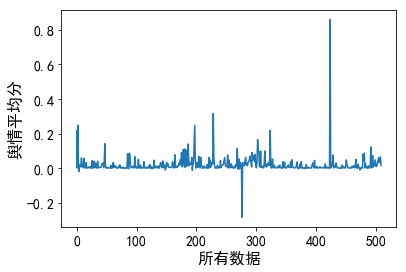

In [35]:
# 舆情平均分画图。查看舆情分数波动
data['AveSentiment'].plot()
plt.xlabel("所有数据")
plt.ylabel("舆情平均分")
plt.show()

In [39]:
# 各个车类型 的 舆情平均分
AveSentiment = data.groupby('类型')['AveSentiment'].mean()
AveSentiment

类型
MPV       0.031074
中型SUV     0.026994
中型车       0.009523
中大型SUV    0.024635
中大型车      0.021330
低端皮卡      0.038126
大型SUV     0.043676
大型车       0.044665
小型SUV     0.014550
小型车       0.017234
微卡       -0.008547
微型车       0.040738
微面        0.021727
紧凑型SUV    0.006700
紧凑型车      0.010820
跑车        0.039330
轻客        0.041978
Name: AveSentiment, dtype: float64

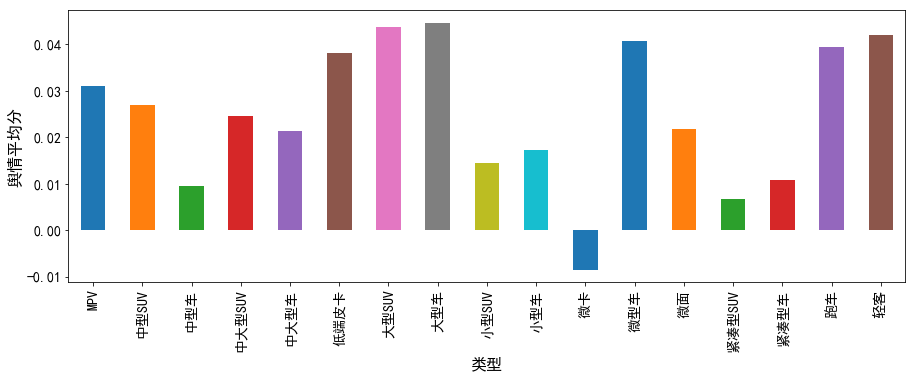

In [44]:
# 每个类型的舆情平均评分，画出柱状图
plt.figure(figsize=(15,5))  # 控制 图片的 长宽
AveSentiment.plot.bar()
plt.ylabel("舆情平均分")
plt.show()

In [41]:
# 汽车的 平均耗油
data["平均耗油/L"] = (data['手动耗油/L']+data['自动耗油/L'])/2
data.head()

,车名,车牌,类型,评分,最高价,最低价,总评数,差评词,差评词次数,总评前几,总评前几内容次数,好评词,好评词次数,手动耗油/L,自动耗油/L,sentiment,LowSentiment,AveSentiment,平均耗油/L
0,奔奔EV,长安,微型车,4.81,144800,95800,4,后备厢空间小,3,"乘坐空间不错,外观时尚,外观比较时尚,后备厢空间小",20,"乘坐空间不错,外观时尚,外观比较时尚",17,12.0,12.0,0.999958,0.135649,0.216077,12.0
1,江铃E200N,江铃集团新能源,微型车,4.75,93800,85800,21,"乘坐空间小,乘坐空间很一般",6,"前排座椅很舒服,乘坐空间很一般,乘坐空间小",9,前排座椅很舒服,3,NaN,NaN,0.901265,0.878560,0.001081,NaN
2,EC系列,北汽新能源,微型车,4.75,61800,59800,4,"后备厢空间太小,悬架减震硬,底盘低",16,"乘坐空间不错,外观时尚,充电方便,后备厢空间太小,操控轻便,悬架减震硬,续航里程不错,中控屏...",63,"乘坐空间不错,外观时尚,充电方便",28,NaN,NaN,0.996210,0.005110,0.247775,NaN
3,众泰E200,众泰,微型车,4.65,69900,69900,61,"悬架减震硬,后备厢空间有点小,悬架减震偏硬",45,"外观时尚,乘坐空间不错,安全配置挺好,悬架减震硬,转向手感很轻,乘坐空间完全够用,后备厢空间...",212,"外观时尚,乘坐空间不错,安全配置挺好",113,11.4,11.4,0.999932,0.005907,0.016295,11.4
4,江铃E200L,江铃集团新能源,微型车,4.51,90800,82800,9,"充电速度太长了,续航里程短",6,"充电速度太长了,续航里程短,乘坐空间可以的",9,乘坐空间可以的,3,10.0,10.0,0.674340,0.843050,-0.018746,10.0


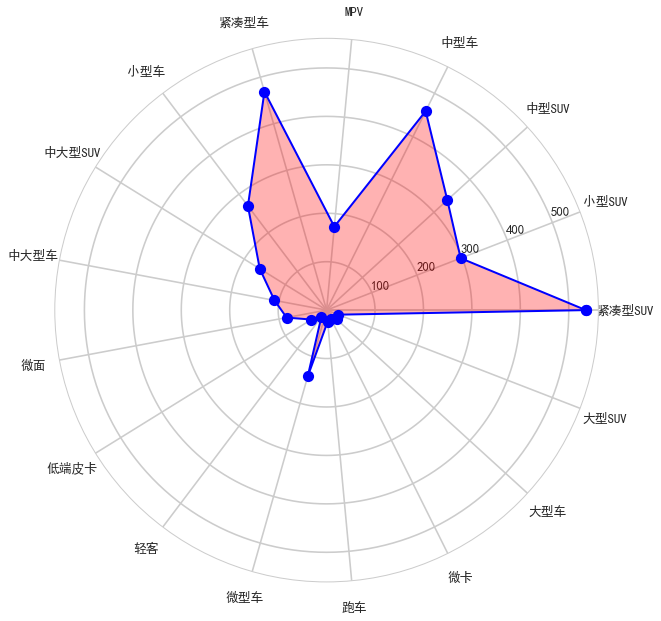

In [363]:
# 所属车类型与总评数量关系。可以看出 紧凑型人们讨论的最多。而轻客，跑车，卡车这些用来谋生和奢侈的车 很少有人讨论
indcateType_list = list(data['类型'].value_counts().index)  # 以车牌总数为索引
indcate_sala = data['总评数'].astype(np.int64).groupby(data['类型']).value_counts()
indcate_num = list(data['类型'].value_counts())
plotlinebar(indcateType_list, indcate_sala, indcate_num)

In [46]:
# 各个车类型 的 舆情平均分
you = data.groupby('类型')['平均耗油/L'].mean()
you.head()

类型
MPV        9.277381
中型SUV     10.000000
中型车        9.438000
中大型SUV          NaN
中大型车      10.954839
Name: 平均耗油/L, dtype: float64

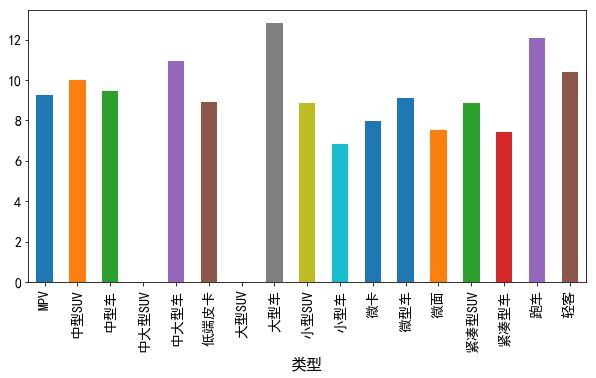

In [47]:
# 每个类型的车的平均耗油，画出柱状图（大型车最多，小型车最少）
plt.figure(figsize=(10,5))
you.plot.bar()
plt.show()

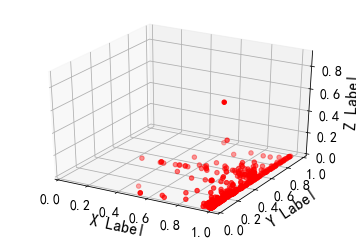

In [50]:
#差评舆情分数，好评舆情分数，和 平均舆情分数。3d立体
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # 3d


if __name__ == '__main__':
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')  # 创建axes类
    xs = data['sentiment'].values
    ys = data['LowSentiment'].values
    zs = data['AveSentiment'].values
    ax.scatter(xs, ys, zs, c='r', marker='o')  # axes类可以绘图
    ax.set_xlim(0)  # axes类可以操作本身(子图)的信息，只不过和plt模块的姿势不同
    ax.set_ylim(0)
    ax.set_zlim(0)
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    plt.show()

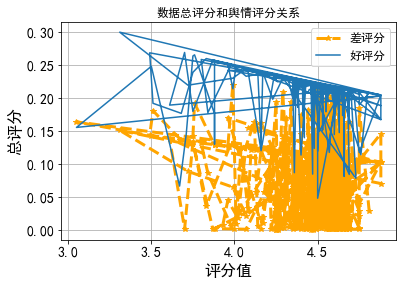

In [57]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

x = data['评分'].values  # 各个数据的 总评分
y= data['LowSentiment'].values/x  # 评分值 = 差评舆情得分/总评
z= data['sentiment'].values/x  # 好评舆情得分/总评
# marker数据点样式，linewidth线宽，linestyle线型样式，color颜色
plt.plot(x, y, marker="*", linewidth=3, linestyle="--", color="orange")
plt.plot(x, z)
plt.title("数据总评分和舆情评分关系")
plt.xlabel("评分值")
plt.ylabel("总评分")
# 设置图例
plt.legend(["差评分","好评分"], loc="upper right")
plt.grid(True)
plt.show()

In [61]:
data["平均价"] = (data['最高价']+data['最低价'])/2

,车名,车牌,类型,评分,最高价,最低价,总评数,差评词,差评词次数,总评前几,总评前几内容次数,好评词,好评词次数,手动耗油/L,自动耗油/L,sentiment,LowSentiment,AveSentiment,平均耗油/L,平均价
0,奔奔EV,长安,微型车,4.81,144800,95800,4,后备厢空间小,3,"乘坐空间不错,外观时尚,外观比较时尚,后备厢空间小",20,"乘坐空间不错,外观时尚,外观比较时尚",17,12.0,12.0,0.999958,0.135649,0.216077,12.0,120300.0
1,江铃E200N,江铃集团新能源,微型车,4.75,93800,85800,21,"乘坐空间小,乘坐空间很一般",6,"前排座椅很舒服,乘坐空间很一般,乘坐空间小",9,前排座椅很舒服,3,NaN,NaN,0.901265,0.878560,0.001081,NaN,89800.0
2,EC系列,北汽新能源,微型车,4.75,61800,59800,4,"后备厢空间太小,悬架减震硬,底盘低",16,"乘坐空间不错,外观时尚,充电方便,后备厢空间太小,操控轻便,悬架减震硬,续航里程不错,中控屏...",63,"乘坐空间不错,外观时尚,充电方便",28,NaN,NaN,0.996210,0.005110,0.247775,NaN,60800.0
3,众泰E200,众泰,微型车,4.65,69900,69900,61,"悬架减震硬,后备厢空间有点小,悬架减震偏硬",45,"外观时尚,乘坐空间不错,安全配置挺好,悬架减震硬,转向手感很轻,乘坐空间完全够用,后备厢空间...",212,"外观时尚,乘坐空间不错,安全配置挺好",113,11.4,11.4,0.999932,0.005907,0.016295,11.4,69900.0
4,江铃E200L,江铃集团新能源,微型车,4.51,90800,82800,9,"充电速度太长了,续航里程短",6,"充电速度太长了,续航里程短,乘坐空间可以的",9,乘坐空间可以的,3,10.0,10.0,0.674340,0.843050,-0.018746,10.0,86800.0


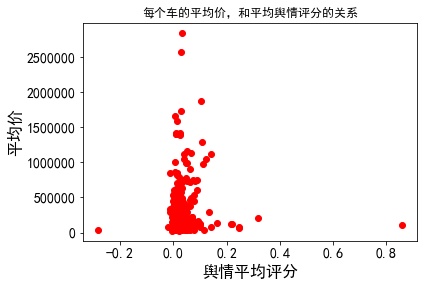

In [64]:
# 可以发现 价格在0-100的车之间，平均舆情分在 0-0.2之间。舆情分数最高的车价格也在0-50万之间。所以0-50万之间的车比较推荐
plt.plot(data['AveSentiment'], data['平均价'], 'ro')
plt.title("每个车的平均价，和平均舆情评分的关系")
plt.xlabel("舆情平均评分")
plt.ylabel("平均价")

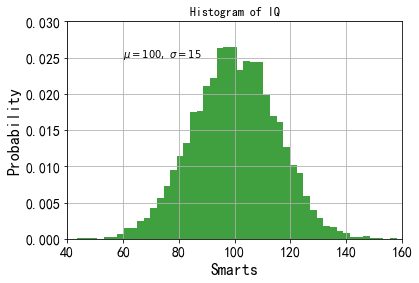

In [51]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, normed=1, facecolor='g', alpha=0.75)


plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)

(-2, 2)

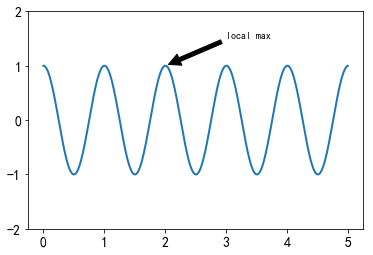

In [52]:
ax = plt.subplot(111)

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = plt.plot(t, s, lw=2)

plt.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

plt.ylim(-2,2)

In [68]:
# -*- coding: UTF-8 -*-
import pandas as pd
df = pd.DataFrame([{'col1':'a', 'col2':1, 'col3':'aa'}, {'col1':'b', 'col2':2, 'col3':'bb'}, {'col1':'c', 'col2':3, 'col3':'cc'}, {'col1':'a', 'col2':44, 'col3':'aa'}])
df

,col1,col2,col3
0,a,1,aa
1,b,2,bb
2,c,3,cc
3,a,44,aa


In [69]:
# 按col1分组并按col2求和
df.groupby(by='col1').agg({'col2':sum}).reset_index()

,col1,col2
0,a,45
1,b,2
2,c,3


In [70]:
# 按col1分组并按col2求最值
df.groupby(by='col1').agg({'col2':['max', 'min']}).reset_index()

col1 col2    
        max min
0    a   44   1
1    b    2   2
2    c    3   3

In [71]:

# 按col1 ，col3分组并按col2求和
df.groupby(by=['col1', 'col3']).agg({'col2':sum}).reset_index()

,col1,col3,col2
0,a,aa,45
1,b,bb,2
2,c,cc,3
